In [18]:
import os
import warnings
import pandas as pd
import csv
from census import Census
from us import states
from apikey import apikey
import requests
import matplotlib.pyplot as plt

#ignore future warnings error
warnings.simplefilter(action='ignore', category=FutureWarning)

c = Census(apikey, year=2017)

In [4]:
# Open and read Texas Graduation Rate data
file = "Data/County_Grad_Data.csv"
HighSchool2017_data = pd.read_csv(file)
HighSchool2017_data.head()

COUNTY         CNTYNAME CNTY_ALLD CNTY_ALLN_CMP2 CNTY_ALLN_GRAD  \
0       1  ANDERSON COUNTY      <600              -              -   
1       2   ANDREWS COUNTY      <250              -              -   
2       3  ANGELINA COUNTY     1,260          1,203          1,164   
3       4   ARANSAS COUNTY      <250              -              -   
4       5    ARCHER COUNTY      <200              -              -   

  CNTY_ALLN_CONT CNTY_ALLN_TXCHSE CNTY_ALLN_DROP  CNTY_ALLR_CMP2  \
0              -                -              -            99.3   
1              -                0              -            97.1   
2             32                7             57            95.5   
3              -                -              -            91.0   
4              -                0              0           100.0   

   CNTY_ALLR_GRAD       ...         CNTY_TTLN_CONT  CNTY_TTLN_TXCHSE  \
0            96.8       ...                      -                 -   
1            95.8       ...                      0                 0   
2            92.4       ...                      -                 -   
3            88.7       ...                      -                 -   
4            99.4       ...                      0                 0   

   CNTY_TTLN_DROP CNTY_TTLR_CMP2 CNTY_TTLR_GRAD CNTY_TTLR_CONT  \
0               -           99.3           97.6            1.5   
1               5           97.8           97.8              0   
2               -           97.4           94.7            2.3   
3               -             91           88.7            1.4   
4               0              .              .              .   

  CNTY_TTLR_TXCHSE CNTY_TTLR_DROP CNTY_TTLR_RAED CNTY_TTLR_RECADV  
0              0.2            0.7           86.9             88.3  
1                0            2.2              -                -  
2              0.4            2.6           79.2             70.5  
3              0.9              9           82.2             82.7  
4                .              .              .                .  

[5 rows x 340 columns]

In [5]:
# Create TX graduation data frame
HighSchool2017_dfw = HighSchool2017_data.loc[HighSchool2017_data['CNTYNAME'].isin(['DENTON COUNTY','COLLIN COUNTY','HUNT COUNTY','ROCKWALL COUNTY','KAUFMAN COUNTY','ELLIS COUNTY','JOHNSON COUNTY','DALLAS COUNTY','SOMMERVILLE COUNTY','HOOD','PARKER COUNTY','WISE COUNTY','TARRANT COUNTY'])]
HighSchool2017_dfw = pd.DataFrame(HighSchool2017_dfw)
HighSchool2017_dfw_df = HighSchool2017_dfw.filter(items=['CNTYNAME','CNTY_ALLR_GRAD','CNTY_AAR_GRAD','CNTY_ASR_GRAD',
                                                         'CNTY_HSR_GRAD','CNTY_MUR_GRAD','CNTY_NAR_GRAD','CNTY_PIR_GRAD',
                                                         'CNTY_WHR_GRAD'])
HighSchool2017_dfw_df.rename(columns={'CNTYNAME':'County Name','CNTY_ALLR_GRAD':'All Students','CNTY_AAR_GRAD':'African American',
                             'CNTY_ASR_GRAD':'Asian','CNTY_HSR_GRAD':'Hispanic','CNTY_MUR_GRAD':'Multiracial','CNTY_NAR_GRAD':'American Indian',
                                      'CNTY_PIR_GRAD':'Pacific Islander','CNTY_WHR_GRAD':'White'},inplace=True)
HighSchool2017_dfw_df

County Name  All Students African American Asian Hispanic  \
42     COLLIN COUNTY          96.8             95.8  98.6     94.4   
56     DALLAS COUNTY          84.0             80.8  93.5       84   
60     DENTON COUNTY          94.5             92.1  96.7     91.4   
69      ELLIS COUNTY          93.1             92.5   100       92   
115      HUNT COUNTY          93.7             91.7   100     95.2   
125   JOHNSON COUNTY          94.7             95.7  91.7     95.2   
128   KAUFMAN COUNTY          95.5               97  93.8     94.4   
181    PARKER COUNTY          96.3             97.1   100       97   
196  ROCKWALL COUNTY          97.0             96.9  97.6     95.2   
217   TARRANT COUNTY          90.5             87.7  94.1     88.2   
246      WISE COUNTY          96.6              100   100     95.8   

    Multiracial American Indian Pacific Islander  White  
42         98.6            96.8             96.4   97.4  
56         81.3            74.4             92.5   87.1  
60         96.7            95.7              100   95.9  
69         90.2            87.5              100   94.0  
115         100            92.3              100   93.0  
125        92.2             100              100   94.4  
128        95.1              80              100   95.8  
181        97.1             100              100   96.1  
196         100             100              100   97.4  
217        92.1              90             95.6   93.9  
246         100             100                .   96.9

In [6]:
# Open and read TX crime data 
TexasCrime2017_data = pd.read_csv("Data/County_crime_data_2017.csv")
TexasCrime2017_data.head()

Agency Name Number of Incidents
0  ANDERSON COUNTY                 268
1   ANDERSON CO SO                 105
2     PALESTINE PD                 151
3     FRANKSTON PD                  12
4   ANDREWS COUNTY                  42

In [7]:
# Create TX crime data frame
DFWCrime2017 = TexasCrime2017_data.loc[TexasCrime2017_data['Agency Name'].isin(['DENTON COUNTY','COLLIN COUNTY','HUNT COUNTY','ROCKWALL COUNTY','KAUFMAN COUNTY','ELLIS COUNTY','JOHNSON COUNTY','DALLAS COUNTY','SOMMERVILLE COUNTY','HOOD','PARKER COUNTY','WISE COUNTY','TARRANT COUNTY'])]
DFWCrime2017_df = pd.DataFrame(DFWCrime2017)
DFWCrime2017_df.columns = ["County Name","Family Violence Incidents"]
DFWCrime2017_df


County Name Family Violence Incidents
210     COLLIN COUNTY                     3,227
264     DALLAS COUNTY                    21,928
304     DENTON COUNTY                     2,249
356      ELLIS COUNTY                       623
603       HUNT COUNTY                       634
639    JOHNSON COUNTY                       925
657    KAUFMAN COUNTY                       682
855     PARKER COUNTY                       520
906   ROCKWALL COUNTY                       382
978    TARRANT COUNTY                    13,827
1135      WISE COUNTY                       176

In [8]:
# Merge TX graduation and crime data
HSGradCrime_2017_df = pd.merge(HighSchool2017_dfw_df,DFWCrime2017_df,on='County Name')
HSGradCrime_2017_df

County Name  All Students African American Asian Hispanic Multiracial  \
0     COLLIN COUNTY          96.8             95.8  98.6     94.4        98.6   
1     DALLAS COUNTY          84.0             80.8  93.5       84        81.3   
2     DENTON COUNTY          94.5             92.1  96.7     91.4        96.7   
3      ELLIS COUNTY          93.1             92.5   100       92        90.2   
4       HUNT COUNTY          93.7             91.7   100     95.2         100   
5    JOHNSON COUNTY          94.7             95.7  91.7     95.2        92.2   
6    KAUFMAN COUNTY          95.5               97  93.8     94.4        95.1   
7     PARKER COUNTY          96.3             97.1   100       97        97.1   
8   ROCKWALL COUNTY          97.0             96.9  97.6     95.2         100   
9    TARRANT COUNTY          90.5             87.7  94.1     88.2        92.1   
10      WISE COUNTY          96.6              100   100     95.8         100   

   American Indian Pacific Islander  White Family Violence Incidents  
0             96.8             96.4   97.4                     3,227  
1             74.4             92.5   87.1                    21,928  
2             95.7              100   95.9                     2,249  
3             87.5              100   94.0                       623  
4             92.3              100   93.0                       634  
5              100              100   94.4                       925  
6               80              100   95.8                       682  
7              100              100   96.1                       520  
8              100              100   97.4                       382  
9               90             95.6   93.9                    13,827  
10             100                .   96.9                       176

In [9]:
# Clean county names to match name style of census
County_Names = ['Collin County, Texas','Dallas County, Texas','Denton County, Texas','Ellis County, Texas','Hunt County, Texas','Johnson County, Texas','Kaufman County, Texas','Parker County, Texas','Rockwall County, Texas','Tarrant County, Texas','Wise County, Texas']
HSGradCrime_2017_df['County'] = County_Names
New_HSGradCrime_2017_df = HSGradCrime_2017_df[['County','All Students','Family Violence Incidents']] 
New_HSGradCrime_2017_df

County  All Students Family Violence Incidents
0     Collin County, Texas          96.8                     3,227
1     Dallas County, Texas          84.0                    21,928
2     Denton County, Texas          94.5                     2,249
3      Ellis County, Texas          93.1                       623
4       Hunt County, Texas          93.7                       634
5    Johnson County, Texas          94.7                       925
6    Kaufman County, Texas          95.5                       682
7     Parker County, Texas          96.3                       520
8   Rockwall County, Texas          97.0                       382
9    Tarrant County, Texas          90.5                    13,827
10      Wise County, Texas          96.6                       176

In [10]:
# Get DFW counties from API
census_data = c.acs5.get('NAME', geo={'for': 'county:121,085,231,397,257,139,251,113,221,367,497,439', 
                                      'in': 'state:%s' % states.TX.fips})

county_pd = pd.DataFrame(census_data)
county_pd

NAME county state
0       Hunt County, Texas    231    48
1     Parker County, Texas    367    48
2     Collin County, Texas    085    48
3   Rockwall County, Texas    397    48
4    Tarrant County, Texas    439    48
5      Ellis County, Texas    139    48
6       Wise County, Texas    497    48
7    Kaufman County, Texas    257    48
8     Denton County, Texas    121    48
9     Dallas County, Texas    113    48
10   Johnson County, Texas    251    48
11      Hood County, Texas    221    48

In [11]:
# Build census data frame
baseUrl = "https://api.census.gov/data/2017/acs/acs5/subject?get="
baseUrl2 = "https://api.census.gov/data/2017/acs/acsse?get="

#census ids
ids = ["K202002_001E", "K202503_002E", 
       "K202503_003E", "K201001_001E",
       "K201501_001E",  "K200101_003E",
       "K200101_002E"]

columns = ['County', 'Median Earnings', '# of Home Owners',
          '# of Renters', '# Married', "Education", 
           "Female Population", "Male Population" ]

censusDf = pd.DataFrame(columns=columns)


In [12]:
# get data for each id by county and populate dataframe
count = 0

for countyid in county_pd['county']: 
    
    for item in ids:
        targetUrl = (baseUrl2 + item + ",NAME" + "&for=county:" +
                           countyid + "&in=state:48" + "&key=" + apikey)
        try:
            resp = requests.get(targetUrl).json()
        except ValueError:
            continue 
            
        if resp[0][0] == 'K202002_001E':
            censusDf.set_value(count, "Median Earnings", resp[1][0])
        if  resp[0][0] == 'K202503_002E':   
            censusDf.set_value(count, "# of Home Owners", resp[1][0])
        if  resp[0][0] == 'K202503_003E':     
            censusDf.set_value(count, "# of Renters", resp[1][0])
        if  resp[0][0] == 'K201001_001E':      
            censusDf.set_value(count, "# Married", resp[1][0])
        if  resp[0][0] == 'K201501_001E':       
            censusDf.set_value(count, "Education", resp[1][0])
        if resp[0][0] == 'K200101_003E':
            censusDf.set_value(count, "Female Population", resp[1][0])
        if resp[0][0] == 'K200101_002E':
            censusDf.set_value(count, "Male Population", resp[1][0])    
    censusDf.set_value(count, "County", resp[1][1])   
    count += 1

In [13]:
censusDf.head(12)

County Median Earnings # of Home Owners # of Renters  \
0       Hunt County, Texas           33664            64565        26438   
1     Parker County, Texas           35129           106949        24700   
2     Collin County, Texas           50212           665040       301277   
3   Rockwall County, Texas           50215            81035        15124   
4    Tarrant County, Texas           36216          1300652       728517   
5      Ellis County, Texas           37201           130247        41512   
6       Wise County, Texas           30706            50042        15105   
7    Kaufman County, Texas           36480            97537        23768   
8     Denton County, Texas           43250           579415       244764   
9     Dallas County, Texas           32275          1392954      1194085   
10   Johnson County, Texas           37424           124558        39913   
11      Hood County, Texas           35828            44759        12757   

   # Married Education Female Population Male Population  
0      75087     61557             48201           45671  
1     106767     90367             66140           67323  
2     760920    635534            492767          476836  
3      75858     63099             49144           47644  
4    1600866   1317559           1047730         1006745  
5     135260    111660             87970           85650  
6      52852     44568             33054           33127  
7      94327     78533             63092           59791  
8     662965    547898            424882          411328  
9    2037627   1676011           1326753         1291395  
10    131321    109599             83170           84131  
11     47778     42041             31058           27215

In [14]:
# Merge all three data sets by county name
Merged_3_df = pd.merge(New_HSGradCrime_2017_df,censusDf,on='County')
Merged_3_df

County  All Students Family Violence Incidents  \
0     Collin County, Texas          96.8                     3,227   
1     Dallas County, Texas          84.0                    21,928   
2     Denton County, Texas          94.5                     2,249   
3      Ellis County, Texas          93.1                       623   
4       Hunt County, Texas          93.7                       634   
5    Johnson County, Texas          94.7                       925   
6    Kaufman County, Texas          95.5                       682   
7     Parker County, Texas          96.3                       520   
8   Rockwall County, Texas          97.0                       382   
9    Tarrant County, Texas          90.5                    13,827   
10      Wise County, Texas          96.6                       176   

   Median Earnings # of Home Owners # of Renters # Married Education  \
0            50212           665040       301277    760920    635534   
1            32275          1392954      1194085   2037627   1676011   
2            43250           579415       244764    662965    547898   
3            37201           130247        41512    135260    111660   
4            33664            64565        26438     75087     61557   
5            37424           124558        39913    131321    109599   
6            36480            97537        23768     94327     78533   
7            35129           106949        24700    106767     90367   
8            50215            81035        15124     75858     63099   
9            36216          1300652       728517   1600866   1317559   
10           30706            50042        15105     52852     44568   

   Female Population Male Population  
0             492767          476836  
1            1326753         1291395  
2             424882          411328  
3              87970           85650  
4              48201           45671  
5              83170           84131  
6              63092           59791  
7              66140           67323  
8              49144           47644  
9            1047730         1006745  
10             33054           33127

In [15]:
# Caluate new metrics ... just an example - need more
# Home Ownership Ratio (# of Home Owners / # of Renters)
Merged_3_df["Home Ownership Ratio"] = Merged_3_df["# of Home Owners"].astype(int) / Merged_3_df["# of Renters"].astype(int)
Merged_3_df


County  All Students Family Violence Incidents  \
0     Collin County, Texas          96.8                     3,227   
1     Dallas County, Texas          84.0                    21,928   
2     Denton County, Texas          94.5                     2,249   
3      Ellis County, Texas          93.1                       623   
4       Hunt County, Texas          93.7                       634   
5    Johnson County, Texas          94.7                       925   
6    Kaufman County, Texas          95.5                       682   
7     Parker County, Texas          96.3                       520   
8   Rockwall County, Texas          97.0                       382   
9    Tarrant County, Texas          90.5                    13,827   
10      Wise County, Texas          96.6                       176   

   Median Earnings # of Home Owners # of Renters # Married Education  \
0            50212           665040       301277    760920    635534   
1            32275          1392954      1194085   2037627   1676011   
2            43250           579415       244764    662965    547898   
3            37201           130247        41512    135260    111660   
4            33664            64565        26438     75087     61557   
5            37424           124558        39913    131321    109599   
6            36480            97537        23768     94327     78533   
7            35129           106949        24700    106767     90367   
8            50215            81035        15124     75858     63099   
9            36216          1300652       728517   1600866   1317559   
10           30706            50042        15105     52852     44568   

   Female Population Male Population  Home Ownership Ratio  
0             492767          476836              2.207404  
1            1326753         1291395              1.166545  
2             424882          411328              2.367239  
3              87970           85650              3.137575  
4              48201           45671              2.442129  
5              83170           84131              3.120738  
6              63092           59791              4.103711  
7              66140           67323              4.329919  
8              49144           47644              5.358040  
9            1047730         1006745              1.785342  
10             33054           33127              3.312943

In [16]:
# Final data frame for analysis and graphs
Final_df = Merged_3_df[['County','All Students','Family Violence Incidents','Median Earnings','Home Ownership Ratio']]

# Sets index to counties
Final_df = Final_df.set_index('County')
Final_df

All Students Family Violence Incidents  \
County                                                           
Collin County, Texas            96.8                     3,227   
Dallas County, Texas            84.0                    21,928   
Denton County, Texas            94.5                     2,249   
Ellis County, Texas             93.1                       623   
Hunt County, Texas              93.7                       634   
Johnson County, Texas           94.7                       925   
Kaufman County, Texas           95.5                       682   
Parker County, Texas            96.3                       520   
Rockwall County, Texas          97.0                       382   
Tarrant County, Texas           90.5                    13,827   
Wise County, Texas              96.6                       176   

                       Median Earnings  Home Ownership Ratio  
County                                                        
Collin County, Texas             50212              2.207404  
Dallas County, Texas             32275              1.166545  
Denton County, Texas             43250              2.367239  
Ellis County, Texas              37201              3.137575  
Hunt County, Texas               33664              2.442129  
Johnson County, Texas            37424              3.120738  
Kaufman County, Texas            36480              4.103711  
Parker County, Texas             35129              4.329919  
Rockwall County, Texas           50215              5.358040  
Tarrant County, Texas            36216              1.785342  
Wise County, Texas               30706              3.312943

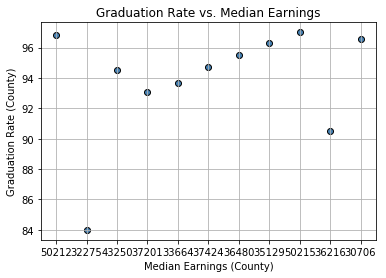

In [19]:
# Build a scatter plot: Median Earnings
plt.scatter(Final_df["Median Earnings"], Final_df["All Students"], marker="o", color="steelblue", edgecolors="black")

# Scatter plot no. 1 - graph properties
plt.title("Graduation Rate vs. Median Earnings")
plt.ylabel("Graduation Rate (County)")
plt.xlabel("Median Earnings (County)")
plt.grid(True)

# Save the figures
#plt.savefig("...GradRateVsMedIncome.png")

# Show plot
plt.show()

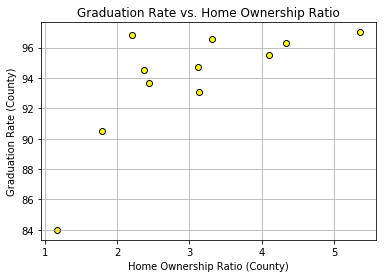

In [20]:
# Build a scatter plot: Median Earnings
plt.scatter(Final_df["Home Ownership Ratio"], Final_df["All Students"], marker="o", color="yellow", edgecolors="black")

# Scatter plot no. 1 - graph properties
plt.title("Graduation Rate vs. Home Ownership Ratio")
plt.ylabel("Graduation Rate (County)")
plt.xlabel("Home Ownership Ratio (County)")
plt.grid(True)

# Save the figures
#plt.savefig("...HORVsMedIncome.png")

# Show plot
plt.show()